S8.01. Vistas en Python


Esta práctica le permitirá explorar cómo las herramientas avanzadas de visualización de Python pueden ser usadas para interpretar y presentar datos de manera efectiva, proporcionando una valiosa oportunidad para mejorar las habilidades analíticas y técnicas.

Nivel 1




Haga la conexión Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que te llame la atencion de graficar esta variable, justifica la elección del gráfico e interpreta los resultados de acuerdo a tus datos.

- Ejercicio 1

Una variable numérica.

In [ ]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='transacciones', #poner nombre BBDD
                                         user='root', # poner usuario correcto
                                         password='Foneria10@')  # pasword correcto
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)

import pandas as pd
import matplotlib.pyplot as plt  #pyplot es un modulo de la libreria de matplotlib
import seaborn as sns
import numpy as np  # es una libreria y primero hay que hacer un pip install

df_transactionnew= pd.read_sql_query("select * from transactionnew", con=connection)
df_companies= pd.read_sql_query("select * from companies", con=connection)
df_credit_cards= pd.read_sql_query("select * from credit_cards", con=connection)
df_estado_tarjetas= pd.read_sql_query("select * from estado_tarjetas", con=connection)
df_products= pd.read_sql_query("select * from products", con=connection)
df_users_total= pd.read_sql_query("select * from users_total", con=connection)



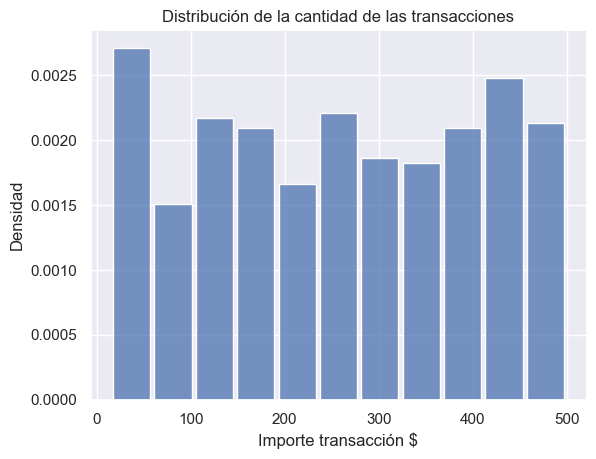

In [2]:
#escoger entre HISTOGRAM o DENSITY PLOT para una unica variable numérica
sns.set_theme(style="darkgrid", context="notebook")
sns.histplot(data=df_transactionnew,
              x="amount",
              stat='density', 
              shrink=0.9)
plt.title('Distribución de la cantidad de las transacciones')
plt.xlabel("Importe transacción $")
plt.ylabel("Densidad")
plt.show()   #significa que la grafica ya esta terminada, sino seguiria presentando el lienzo

El uso del estadístico 'density' en el parámetro stat permite visualizar la densidad de la distribución de los valores de la columna "amount", lo cual es relevante para entender la forma y características de la distribución de las cantidades de las transacciones.

El 27% de las transacciones fueron de menos de 50$, y llama la atención que el segundo en ranking de densidad fueron transacciones entre 400 y 450$ representando un 25%  del total de la BBDD. 

Las transacciones entre 50 y 100$ son las menos representativas en la BBDD.

Ejercicio 2

Dos variables numéricas.



Escogeré como variables numéricas las que son del tipo int64 o float64 y sobre las cuales se puedan hacer calculos. p.e. Amount y peso (lo cambio a num antes de hacer el grafico porque aparece como varchar)
Usaré un scatter plot porque considero que las variables no estan ordenadas

In [54]:
df_products['weight'] = df_products['weight'].astype(float)


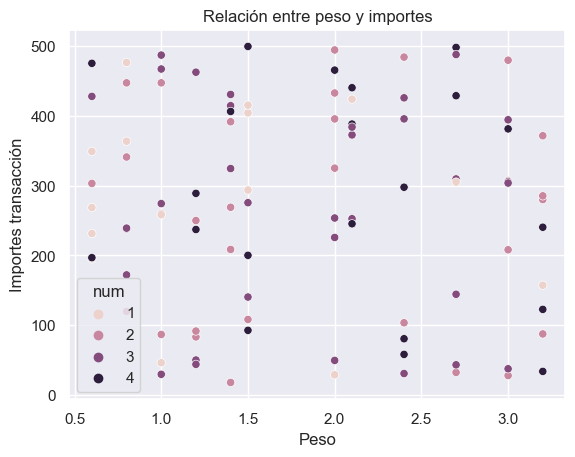

In [4]:
sns.set_theme(style="darkgrid", context="notebook")
sns.scatterplot(x=df_products["weight"],
            y=df_transactionnew["amount"],
            hue= df_transactionnew["num"])
plt.title("Relación entre peso y importes")
plt.xlabel("Peso")
plt.ylabel("Importes transacción")
plt.show()

Interpretacion: Productos que pesan poco (alrededor de 0.5), forman parte de transacciones de importes > 200$. Es decir, no aparecen en transacciones de menos de 200$. 
Si nos fijamos en los productos de peso maximo, se vé el comportamiento contrario, aparecen en transacciones de menos de 400$ y no aparecen en transacciones de mas de 400$.
En cada peso, aparecen segmentos de importes donde no estan representados. Pesos de 2, no tienen transacciones entre 50 y 200$, se encuentran en la parte baja o bien en la parte alta de importes de transacciones.

Ejercicio 3

Una variable categórica.

c:\Users\nuria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


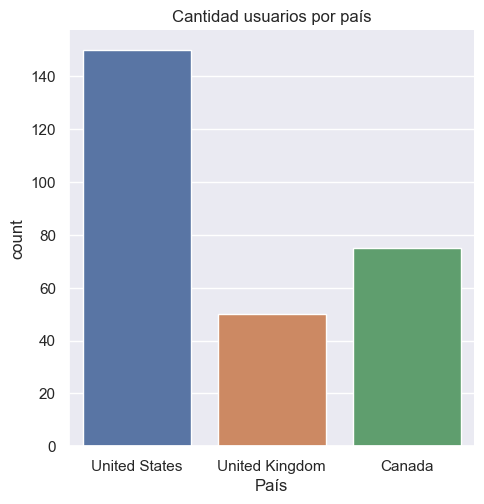

In [5]:
# usaré un CATPLOT para variable categórica y en el tipo escogeré un COUNT para representar los datos en funcion del país de cada usuario.
sns.catplot(data=df_users_total,
            x="country",
            kind="count",
            errorbar=None)
plt.title("Cantidad usuarios por país")
plt.xlabel("País")

plt.show()

La BBDD de usuarios comprenden la suma de los 3 paises: 275 usuarios. 
Los usuarios de Estados Unidos son 150, representan el 55% de toda la BBDD y es el país con la mayor cantidad de usuarios. Seguido por Canadá con 75 usuarios, representan el 27%, y por ultimo, Reino Unido con 50 usuarios representa el 18% de la BBDD.


Ejercicio 4

Una variable categórica y una variable numérica.

Puedo utilizar el BOXPLOT para ver la distribucion de una varible numerica en funcion de una variable categórica. p.e. Importe de transacciones por país de cada empresa.

Usaré tabla transactionnew (amount) y tabla company (country), hago un merge de las dos.

In [ ]:
transactioncompany=df_transactionnew.merge(df_companies,how="inner",left_on="business_id", right_on="company_id")
transactioncompany.head(3)

c:\Users\nuria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


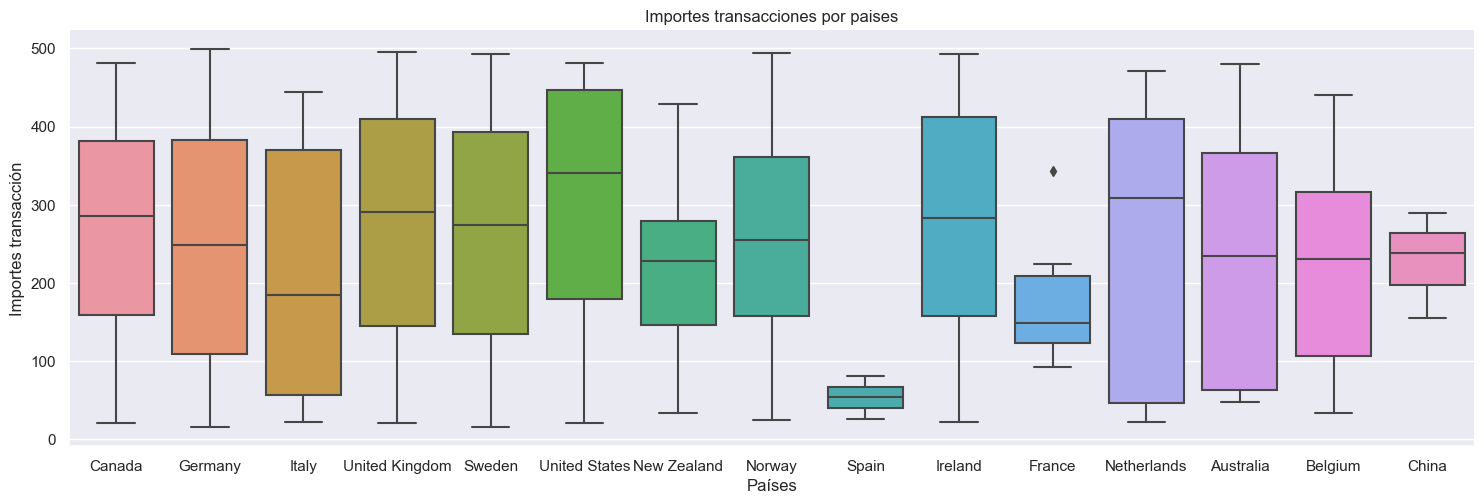

In [7]:
sns.set_theme(style="darkgrid", context="notebook")
sns.catplot(x="country", 
            y="amount",
            data=transactioncompany,
            kind="box",
            aspect=3)
plt.title("Importes transacciones por paises")
plt.xlabel("Países")
plt.ylabel("Importes transacción")
plt.show()

Esta gráfica nos permite distinguir los cuartiles Q1 y Q3 (límites superior e inferior de las "cajas", distancia llamada rango intercuartil), la mediana(linea horizontal dentro de la caja) y los valores considerados "normales" entre los topes superior e inferior de las líneas verticales. Fuera de estos límites vemos los valores anómales (outliers)

En Francia aparece un Outliner, es decir algo atípico que podemos analizar. Todas las operaciones son de importes comprendidos entre 100 y 200, pero aparece una unica transaccion por 350$.

El país con la media de transacciones más pequeña fue España, 50$.

El país que tiene la media de las transacciones más elevada es Estados Unidos con aprox 350$.

Todos los paises excepto España, Francia y China tienen transacciones que van desde el importe minimo al maximo.

Ejercicio 5

Dos variables categóricas.

Voy a analizar Country y City de la tabla usuarios.
Para ello escojo un TreeMap. Voy a instalar la lireria plotly.express que me permite que el gráfico sea interactivo.

In [8]:
import plotly.express as px

df_treemap = df_users_total.groupby(["country", "city"]).size().reset_index(name="count")

# Crear el treemap
fig = px.treemap(df_treemap, path=[px.Constant("world"), 'country', 'city'], values='count', width=600, height=600)

# Mostrar el treemap
fig.show()

Los usuarios provienen de 3 paises: Estados Unidos, Canada y Reino Unido. Este grafica de treemap nos permite ver que más de la mitad de los usuarios pertenecen a Estados Unidos (55%), el siguiente grupo de usuarios pertenece a Canadá y representan un 27% y el último grupo de usuarios pertenecen a Reino Unido representando un 18%.

Ejercicio 6

Tres variables.

Una numérica: amount, y dos categóricas: declined y country
Usaré un barplot: en el eje X pais, eje Y: amount transacciones, y el matiz será si las transacciones fueron declinadas o no.

c:\Users\nuria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



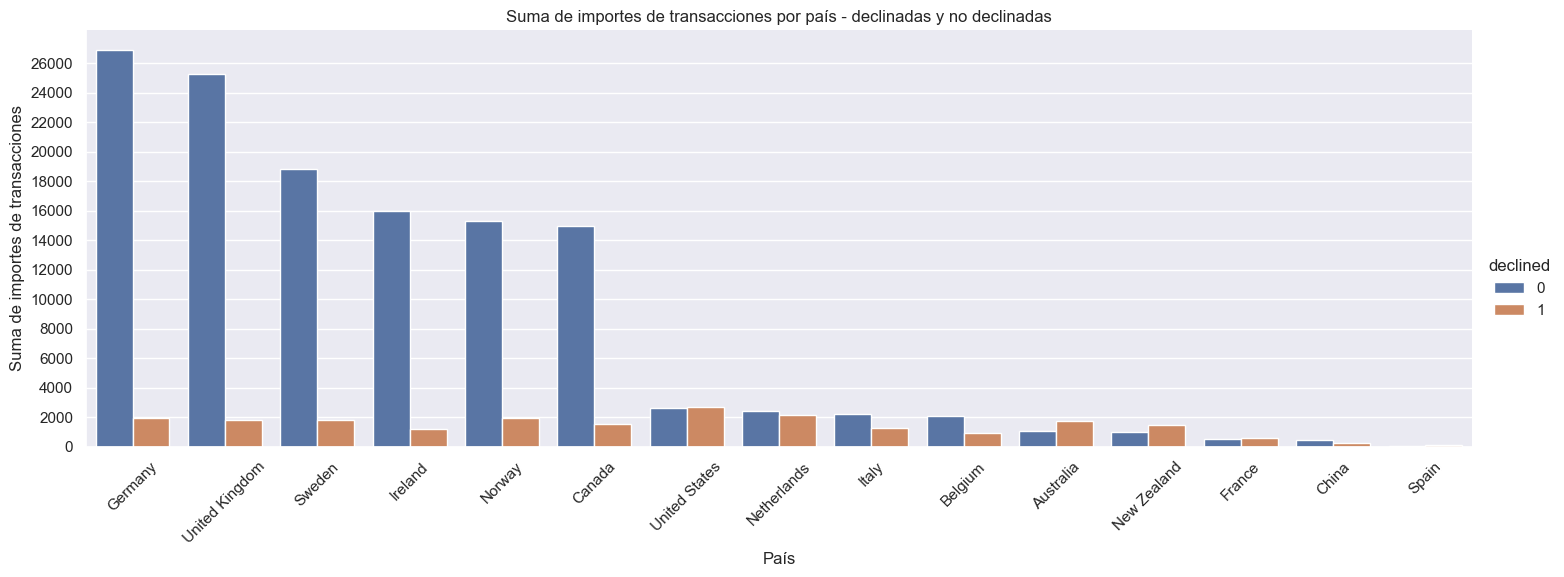

In [9]:
# Agrupar los datos por país y estado de declinación, y calcular la suma de los importes
df_grouped = transactioncompany.groupby(["country", "declined"])["amount"].sum().reset_index()

# Ordenar los datos por la suma de los importes de manera descendente

df_grouped = df_grouped.sort_values(["amount", "country"], ascending=[False, False])

# Crear el gráfico de barras
sns.catplot(
    data=df_grouped,
    x="country",
    y="amount",
    hue="declined",
    kind="bar",
    errorbar=None,
    aspect=3
)

# Agregar título y etiquetas
plt.title("Suma de importes de transacciones por país - declinadas y no declinadas")
plt.xlabel("País")
plt.ylabel("Suma de importes de transacciones")
plt.xticks(rotation=45)
plt.yticks(np.arange(min(df_grouped['amount'])-26, max(df_grouped['amount'])+1, 2000))

plt.show()

El país con mayores ventas ejecutadas (es decir NO declinadas), fue Alemania con más de 26.000$, seguido por Reino Unido 25.000$ y Suecia 19.000$.

Llama la atencion que Estados Unidos tuvo el mismo importe de ventas declinadas y no declinadas, similar a Netherlands. (aprox. 3.000$)

6 países son claves para esta empresa (por orden de ventas no declinadas): Alemania, Reino Unido, Suecia, Irlanda, Noruega y Canadá.

El resto de paises no obtuvieron ventas definitivas superiores a 2.000$

Ejercicio 7

Graficar un Pairplot.

Voy a relacionar la variable precio y peso de tabla products. A la variable precio le quito el $ para ponerla como numerica.

In [10]:

df_products['price'] = df_products['price'].str.replace('$', '').str.strip().astype(float)

c:\Users\nuria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



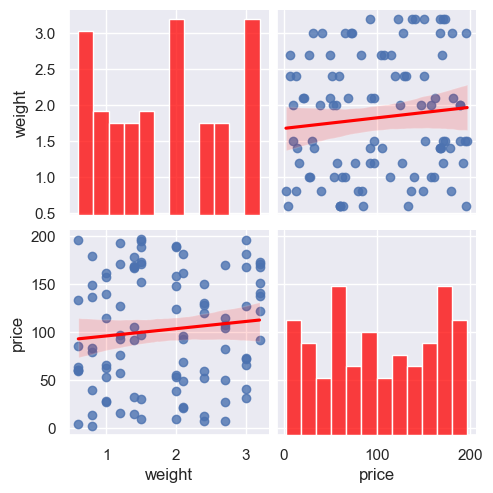

In [52]:
cols_to_plot=["weight","price"]
sns.pairplot(df_products[cols_to_plot], 
             diag_kind="hist",
             diag_kws={"color":"red", "bins":12} ,  
             
             kind="reg",
             plot_kws={'line_kws':{"color":"red"}},
           
             
             )

plt.show()



Con el primer gráfico de los 4 he podido darme cuenta que no existen productos con pesos comprendidos entre 1.7 y 2, entre 2.1 y 2.4, y entre 2.7 y 3 Kgs. Esta información sería útil para poder pactar con nuestro agente de transporte las tarifas de precios por peso dejando que nos suban las tarifas para estos rangos de pesos y negociando el resto de rangos de pesos a la baja.

Analizando el segundo y tercer gráfico veo que hay una correlacion ascendente entre el precio y el peso, es decir, a más peso, el precio tiende a ser ligeramente mayor.

Analizando el cuarto gráfico veo que los productos más comprados fueron los de precio entre 50 y 70$ y los de precio entre 170 y 180$

Nivel 2
Ejercicio 1

Correlación de todas las variables numéricas.

Haré una Matriz de correlación con amount, latitud y longitud,  y otra matriz con peso y precio. Por defecto correlacion de Pearson(lineal).

            amount       lat  longitud
amount    1.000000  0.078116  0.043438
lat       0.078116  1.000000 -0.006894
longitud  0.043438 -0.006894  1.000000


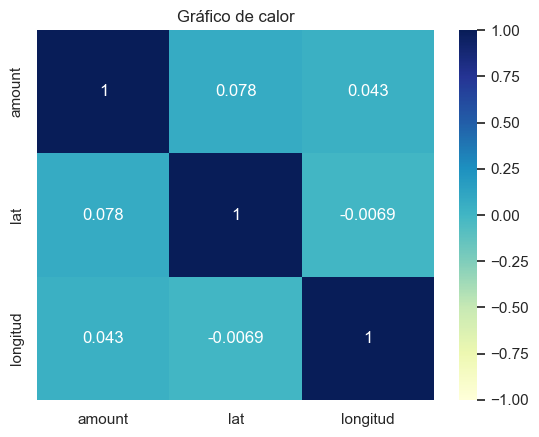

In [12]:
#primero seleccionaré las columnas que quiero visualizar de la tabla transactionnew
columnsheatmap=["amount", "lat", "longitud"]

df_heatmap=df_transactionnew[columnsheatmap]
corr_matrix=df_heatmap.corr()
print(corr_matrix)
sns.heatmap(corr_matrix,
             annot=True, 
             cmap="YlGnBu",
             vmax=1, 
             vmin=-1)
plt.title("Gráfico de calor")
plt.show()

          weight     price
weight  1.000000  0.105431
price   0.105431  1.000000


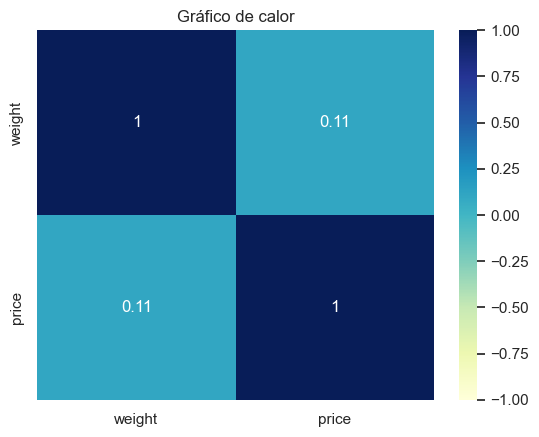

In [13]:
columnsheatmap2=["weight", "price"]

df_heatmap2=df_products[columnsheatmap2]
corr_matrix2=df_heatmap2.corr()
print(corr_matrix2)
sns.heatmap(corr_matrix2,
             annot=True, 
             cmap="YlGnBu",
             vmax=1, 
             vmin=-1)
plt.title("Gráfico de calor")
plt.show()

Ambas correlaciones estan por debajo de + /- 0.5, por lo que existe una Correlacion Débil.

Ejercicio 2

Implementa un jointplot.

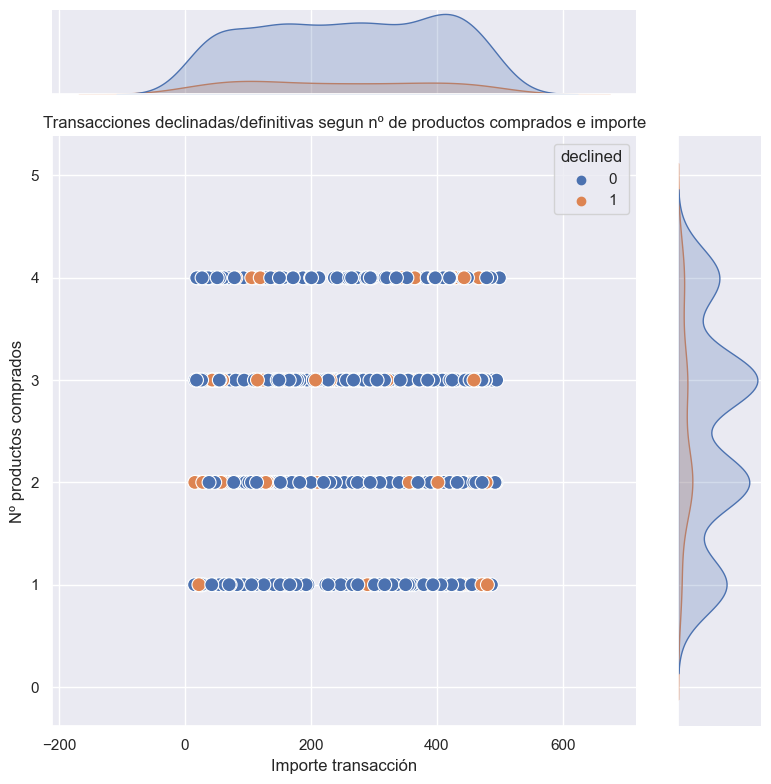

In [50]:
sns.jointplot(data=df_transactionnew,
                 x="amount",  
                  y="num", 
                  hue= "declined",
                  height=8,
                  ratio=5,
                  space=0.5,
                  s=100,
                  ) 
plt.title("Transacciones declinadas/definitivas segun nº de productos comprados e importe")
plt.xlabel("Importe transacción")
plt.ylabel("Nº productos comprados")
plt.show()


Llama la atención que no existieran transacciones de 200$ cuando se compró solo 1 producto. 
Las operaciones NO declinadas fueron mayores cuando las transacciones fueron de 400$.
Las transacciones NO declinadas donde se adquirieron 3 productos fueron las mayores.
Las mayores transacciones fueron de 3 productos y 400$.